In [1]:
# ❗ Запусти цей блок один раз для встановлення потрібних бібліотек
!pip install --upgrade tpot
!pip install torch
!pip install --upgrade joblib
!pip install tabulate



Завдання 2.1. Підготовка даних

Завдання 2.2. Однокритеріальна оптимізація (ROC AUC)


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9134798057378702

Generation 2 - Current best internal CV score: 0.9134798057378702

Generation 3 - Current best internal CV score: 0.9134798057378702

Generation 4 - Current best internal CV score: 0.9138999406154831

Generation 5 - Current best internal CV score: 0.9150769530241671

Best pipeline: XGBClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=20, min_samples_split=10, n_estimators=100), learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)

Оптимізована модель за ROC AUC:
ROC AUC: 0.9053, Precision: 1.0000, Recall: 0.0000

Завдання 2.3. Багатокритеріальна оптимізація (Precision + Recall через balanced_accuracy)


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.802724169498363

Generation 2 - Current best internal CV score: 0.802724169498363

Generation 3 - Current best internal CV score: 0.8139223261803907

Generation 4 - Current best internal CV score: 0.8139223261803907

Generation 5 - Current best internal CV score: 0.8186823690049495

Best pipeline: GaussianNB(ExtraTreesClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=10, max_features=0.5, min_samples_leaf=14, min_samples_split=10, n_estimators=100, subsample=0.5), bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=5, min_samples_split=9, n_estimators=100))

Багатокритеріальна оптимізація:
Precision: 0.7966, Recall: 0.6912, F1-score: 0.7402

Завдання 2.4. Аналіз Парето-фронту (precision vs recall)


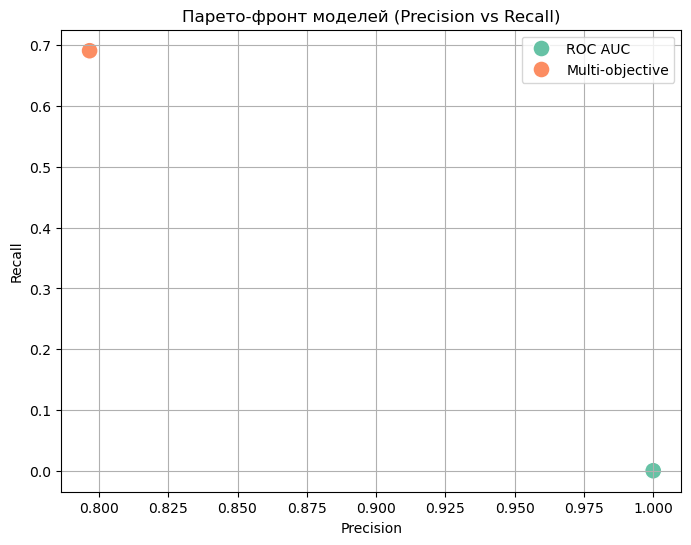


Моделі з Парето-фронту:
Модель з найкращим Precision: ROC AUC
Модель з найкращим Recall: Multi-objective
Модель з найкращим F1-score: Multi-objective

Завдання 2.5. Аналіз важливості ознак

Важливість ознак для моделі (ROC AUC):
         Feature  Importance
0   Passengerid         0.0
14       zero.8         0.0
25      zero.17         0.0
24     Embarked         0.0
23      zero.16         0.0
22      zero.15         0.0
21       Pclass         0.0
20      zero.14         0.0
19      zero.13         0.0
18      zero.12         0.0
17      zero.11         0.0
16      zero.10         0.0
15       zero.9         0.0
13       zero.7         0.0
1           Age         0.0
12        Parch         0.0
11       zero.6         0.0
10       zero.5         0.0
9        zero.4         0.0
8        zero.3         0.0
7        zero.2         0.0
6        zero.1         0.0
5          zero         0.0
4         sibsp         0.0
3           Sex         0.0
2          Fare         0.0
26      zero.

In [14]:
print("\nЗавдання 2.1. Підготовка даних")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from tpot import TPOTClassifier
from sklearn.inspection import permutation_importance
from tabulate import tabulate

# Завантаження даних
data = pd.read_csv("train_and_test2.csv")
data.dropna(inplace=True)

# Вибір змінних
X = data.drop(columns=["2urvived"])
y = data["2urvived"].astype(int)

# Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Перетворення X_test у DataFrame з назвами колонок
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nЗавдання 2.2. Однокритеріальна оптимізація (ROC AUC)")
tpot_roc = TPOTClassifier(
    generations=5,
    population_size=20,
    scoring='roc_auc',
    verbosity=2,
    random_state=42,
    n_jobs=2
)
tpot_roc.fit(X_train, y_train)

# Оцінка
y_pred_proba_roc = tpot_roc.predict_proba(X_test_df)[:, 1]
y_pred_roc = tpot_roc.predict(X_test_df)
roc_auc = roc_auc_score(y_test, y_pred_proba_roc)
precision = precision_score(y_test, y_pred_roc, zero_division=1)
recall = recall_score(y_test, y_pred_roc)

print(f"\nОптимізована модель за ROC AUC:\nROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

print("\nЗавдання 2.3. Багатокритеріальна оптимізація (Precision + Recall через balanced_accuracy)")
tpot_multi = TPOTClassifier(
    generations=5,
    population_size=20,
    scoring='balanced_accuracy',
    verbosity=2,
    random_state=42,
    n_jobs=2
)
tpot_multi.fit(X_train, y_train)

# Метрики
y_pred_multi = tpot_multi.predict(X_test_df)
precision_multi = precision_score(y_test, y_pred_multi, zero_division=1)
recall_multi = recall_score(y_test, y_pred_multi)
f1_multi = f1_score(y_test, y_pred_multi)

print(f"\nБагатокритеріальна оптимізація:\nPrecision: {precision_multi:.4f}, Recall: {recall_multi:.4f}, F1-score: {f1_multi:.4f}")

print("\nЗавдання 2.4. Аналіз Парето-фронту (precision vs recall)")
pareto_data = pd.DataFrame({
    "Модель": ["ROC AUC", "Multi-objective"],
    "Precision": [precision, precision_multi],
    "Recall": [recall, recall_multi]
})

# Візуалізація
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pareto_data, x="Precision", y="Recall", hue="Модель", s=150, palette="Set2")
plt.title("Парето-фронт моделей (Precision vs Recall)")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()

# Обчислення F1-score
pareto_data["F1"] = 2 * (pareto_data["Precision"] * pareto_data["Recall"]) / (pareto_data["Precision"] + pareto_data["Recall"])
idx_best_prec = pareto_data["Precision"].idxmax()
idx_best_rec = pareto_data["Recall"].idxmax()
idx_best_f1 = pareto_data["F1"].idxmax()

print("\nМоделі з Парето-фронту:")
print("Модель з найкращим Precision:", pareto_data.iloc[idx_best_prec]["Модель"])
print("Модель з найкращим Recall:", pareto_data.iloc[idx_best_rec]["Модель"])
print("Модель з найкращим F1-score:", pareto_data.iloc[idx_best_f1]["Модель"])

print("\nЗавдання 2.5. Аналіз важливості ознак")
for model, name in zip([tpot_roc, tpot_multi], ["ROC AUC", "Multi-objective"]):
    importance = permutation_importance(model.fitted_pipeline_, X_test_df, y_test, n_repeats=10, random_state=42)
    feature_importances = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importance.importances_mean
    }).sort_values(by="Importance", ascending=False)

    print(f"\nВажливість ознак для моделі ({name}):\n", feature_importances)

print("\nЗавдання 2.6. Висновки та рекомендації")

# Порівняльна таблиця моделей
results = pd.DataFrame({
    "Метод": ["Однокритеріальна (ROC AUC)", "Багатокритеріальна (Precision & Recall)"],
    "ROC AUC": [f"{roc_auc:.4f}", "-"],
    "Precision": [f"{precision:.4f}", f"{precision_multi:.4f}"],
    "Recall": [f"{recall:.4f}", f"{recall_multi:.4f}"],
    "F1-score": ["-", f"{f1_multi:.4f}"]
})

print("\nПорівняльна таблиця моделей:")
print(tabulate(results, headers='keys', tablefmt='grid', showindex=False))

print("\nРекомендації:")
print("- Якщо потрібен максимальний ROC AUC (наприклад, у медичній діагностиці) — обираємо однокритеріальну модель.")
print("- Якщо важливий баланс між precision і recall — підходить багатокритеріальна модель.")
print("- TPOT дозволяє швидко знаходити ефективні моделі без ручного тюнінгу, але не дає прямого контролю над багатометричними Парето-фронтами, як Auto-sklearn.")
